<p style="color: #000000; font-size: 32px; font-weight: bold; text-align: center; margin-top: 20px;"> 
Age Estimation Using Computer Vision
</p>
<p style="color: #000000; font-size: 24px; text-align: center; margin-bottom: 20px;">
Age Verification in Alcohol Purchases
</p>

<hr style="border: .4px solid #000000; width: 70%; margin: 10px auto;">

<p style="color: #000000; font-size: 18px;">
The supermarket chain Good Seed is implementing a system to ensure compliance with alcohol sales laws. This system will use computer vision to verify that people purchasing alcohol are of legal age. The goal is to develop a model capable of estimating a person's age from photographs taken by security cameras at the checkout area.
</p>

<p style="color: #000000; font-size: 20px; font-weight: bold;">Project Objective:</p>
<p style="color: #000000; font-size: 18px;">
The objective is to train a computer vision model that accurately estimates people's age to ensure alcohol is not sold to minors. The model must achieve a high level of accuracy in age estimations to meet legal requirements.
</p>

<p style="color: #000000; font-size: 20px; font-weight: bold;">Data Dictionary:</p>
<p style="color: #000000; font-size: 18px;">
The dataset contains photographs of individuals along with their corresponding age. Each image must be processed by the model to estimate the person's age.
</p>

## Initialization

In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

## Load the Data

The dataset is stored in the folder `faces`
- The folder `final_files` contains 7,600 photos
- The file `labels.csv` contains labels with two columns: `file_name` and `real_age`

Since the number of image files is quite large, it is recommended to avoid loading them all at once, as this would consume many computational resources. It is suggested to create a generator using ImageDataGenerator. This method was explained in chapter 3, lesson 7 of this course.

The label file can be loaded as a regular CSV file.

In [5]:
# Load the Data 
labels = pd.read_csv('faces/labels.csv')

In [6]:
# General Info.
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


The DataFrame contains **7,591 rows** and **2 columns**:

- **file_name** (`object`): Image file names.
- **real_age** (`int64`): The real age associated with each file.

The data types are correct. There are no null values. Now, let's check for duplicates.

In [7]:
# Count duplicates
duplicate_count = labels.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## Exploratory Data Analysis

In [8]:
# Basic Statistics
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


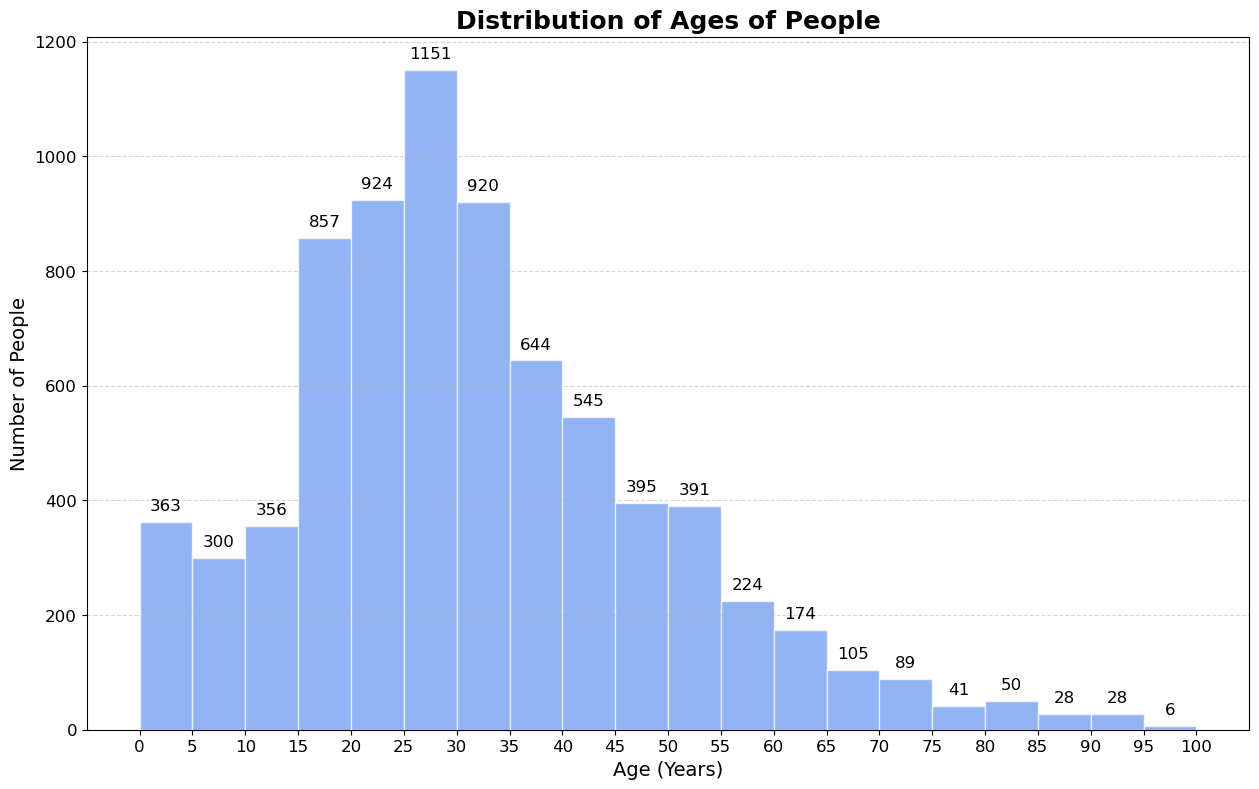

In [9]:
# Create Histogram 
plt.figure(figsize=(15, 9))
# Plot histogram
counts, bins, patches = plt.hist(labels['real_age'], bins=np.arange(0, 105, 5), edgecolor='white', 
                                  linewidth=1, color='cornflowerblue', alpha=0.7)

# Labels and title
plt.title('Distribution of Ages of People', fontsize=18, fontweight='bold')
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(np.arange(0, 105, 5), fontsize=12)
plt.yticks(fontsize=12)

# Add total count above each bar
for count, x in zip(counts, bins[:-1]):
    plt.text(x + 2.5, count + 20, f'{int(count)}', ha='center', fontsize=12)

# Add gridlines 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

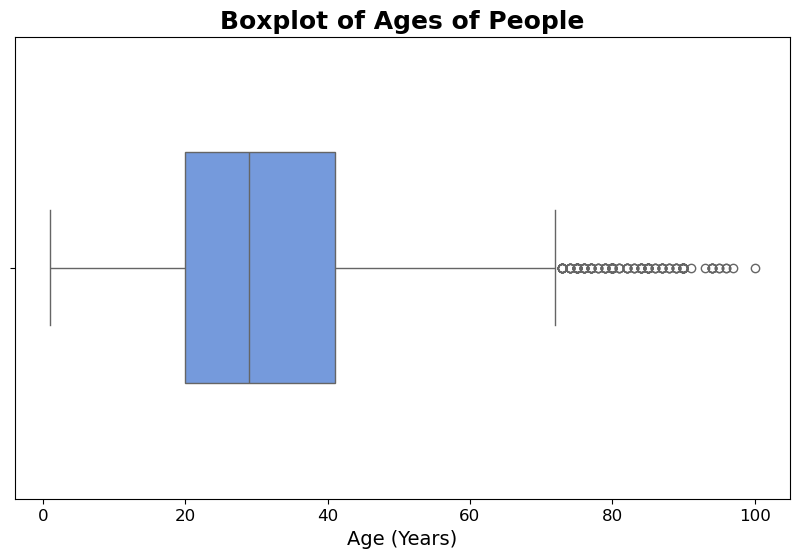

In [10]:
# Boxplot of Ages of People
plt.figure(figsize=(10, 6))
# Create boxplot
sns.boxplot(x=labels['real_age'], color='cornflowerblue', width=0.5)
plt.title('Boxplot of Ages of People', fontsize=18, fontweight='bold')
plt.xlabel('Age (Years)', fontsize=14)
plt.xticks(fontsize=12)
# Show plot
plt.show()

**Analysis of the graphs**:  
The data shows a distribution with a mean of **31.20 years** and a standard deviation of **17.15 years**, indicating significant dispersion. Most of the ages are concentrated between **20.00 and 41.00 years**, according to the first and third quartile values, respectively. The median is **29.00 years**, suggesting that half of the data points are below this age and the other half above it. Additionally, there are extreme values such as **1.00 and 100.00 years**, which could indicate the presence of outliers or a diverse population in the dataset.

In [11]:
# Calculate the number of users under the age of 21 and total users
underage = (labels['real_age'] < 21).sum()
all_users = len(labels)

# Print statistics
print(f'There are {underage} people in the dataset out of {all_users} people.')
print(f'This represents {underage / all_users:.2%} of the dataset.')

There are 2054 people in the dataset out of 7591 people.
This represents 27.06% of the dataset.


We can see that more than a quarter of the total data is below the minimum legal drinking age.

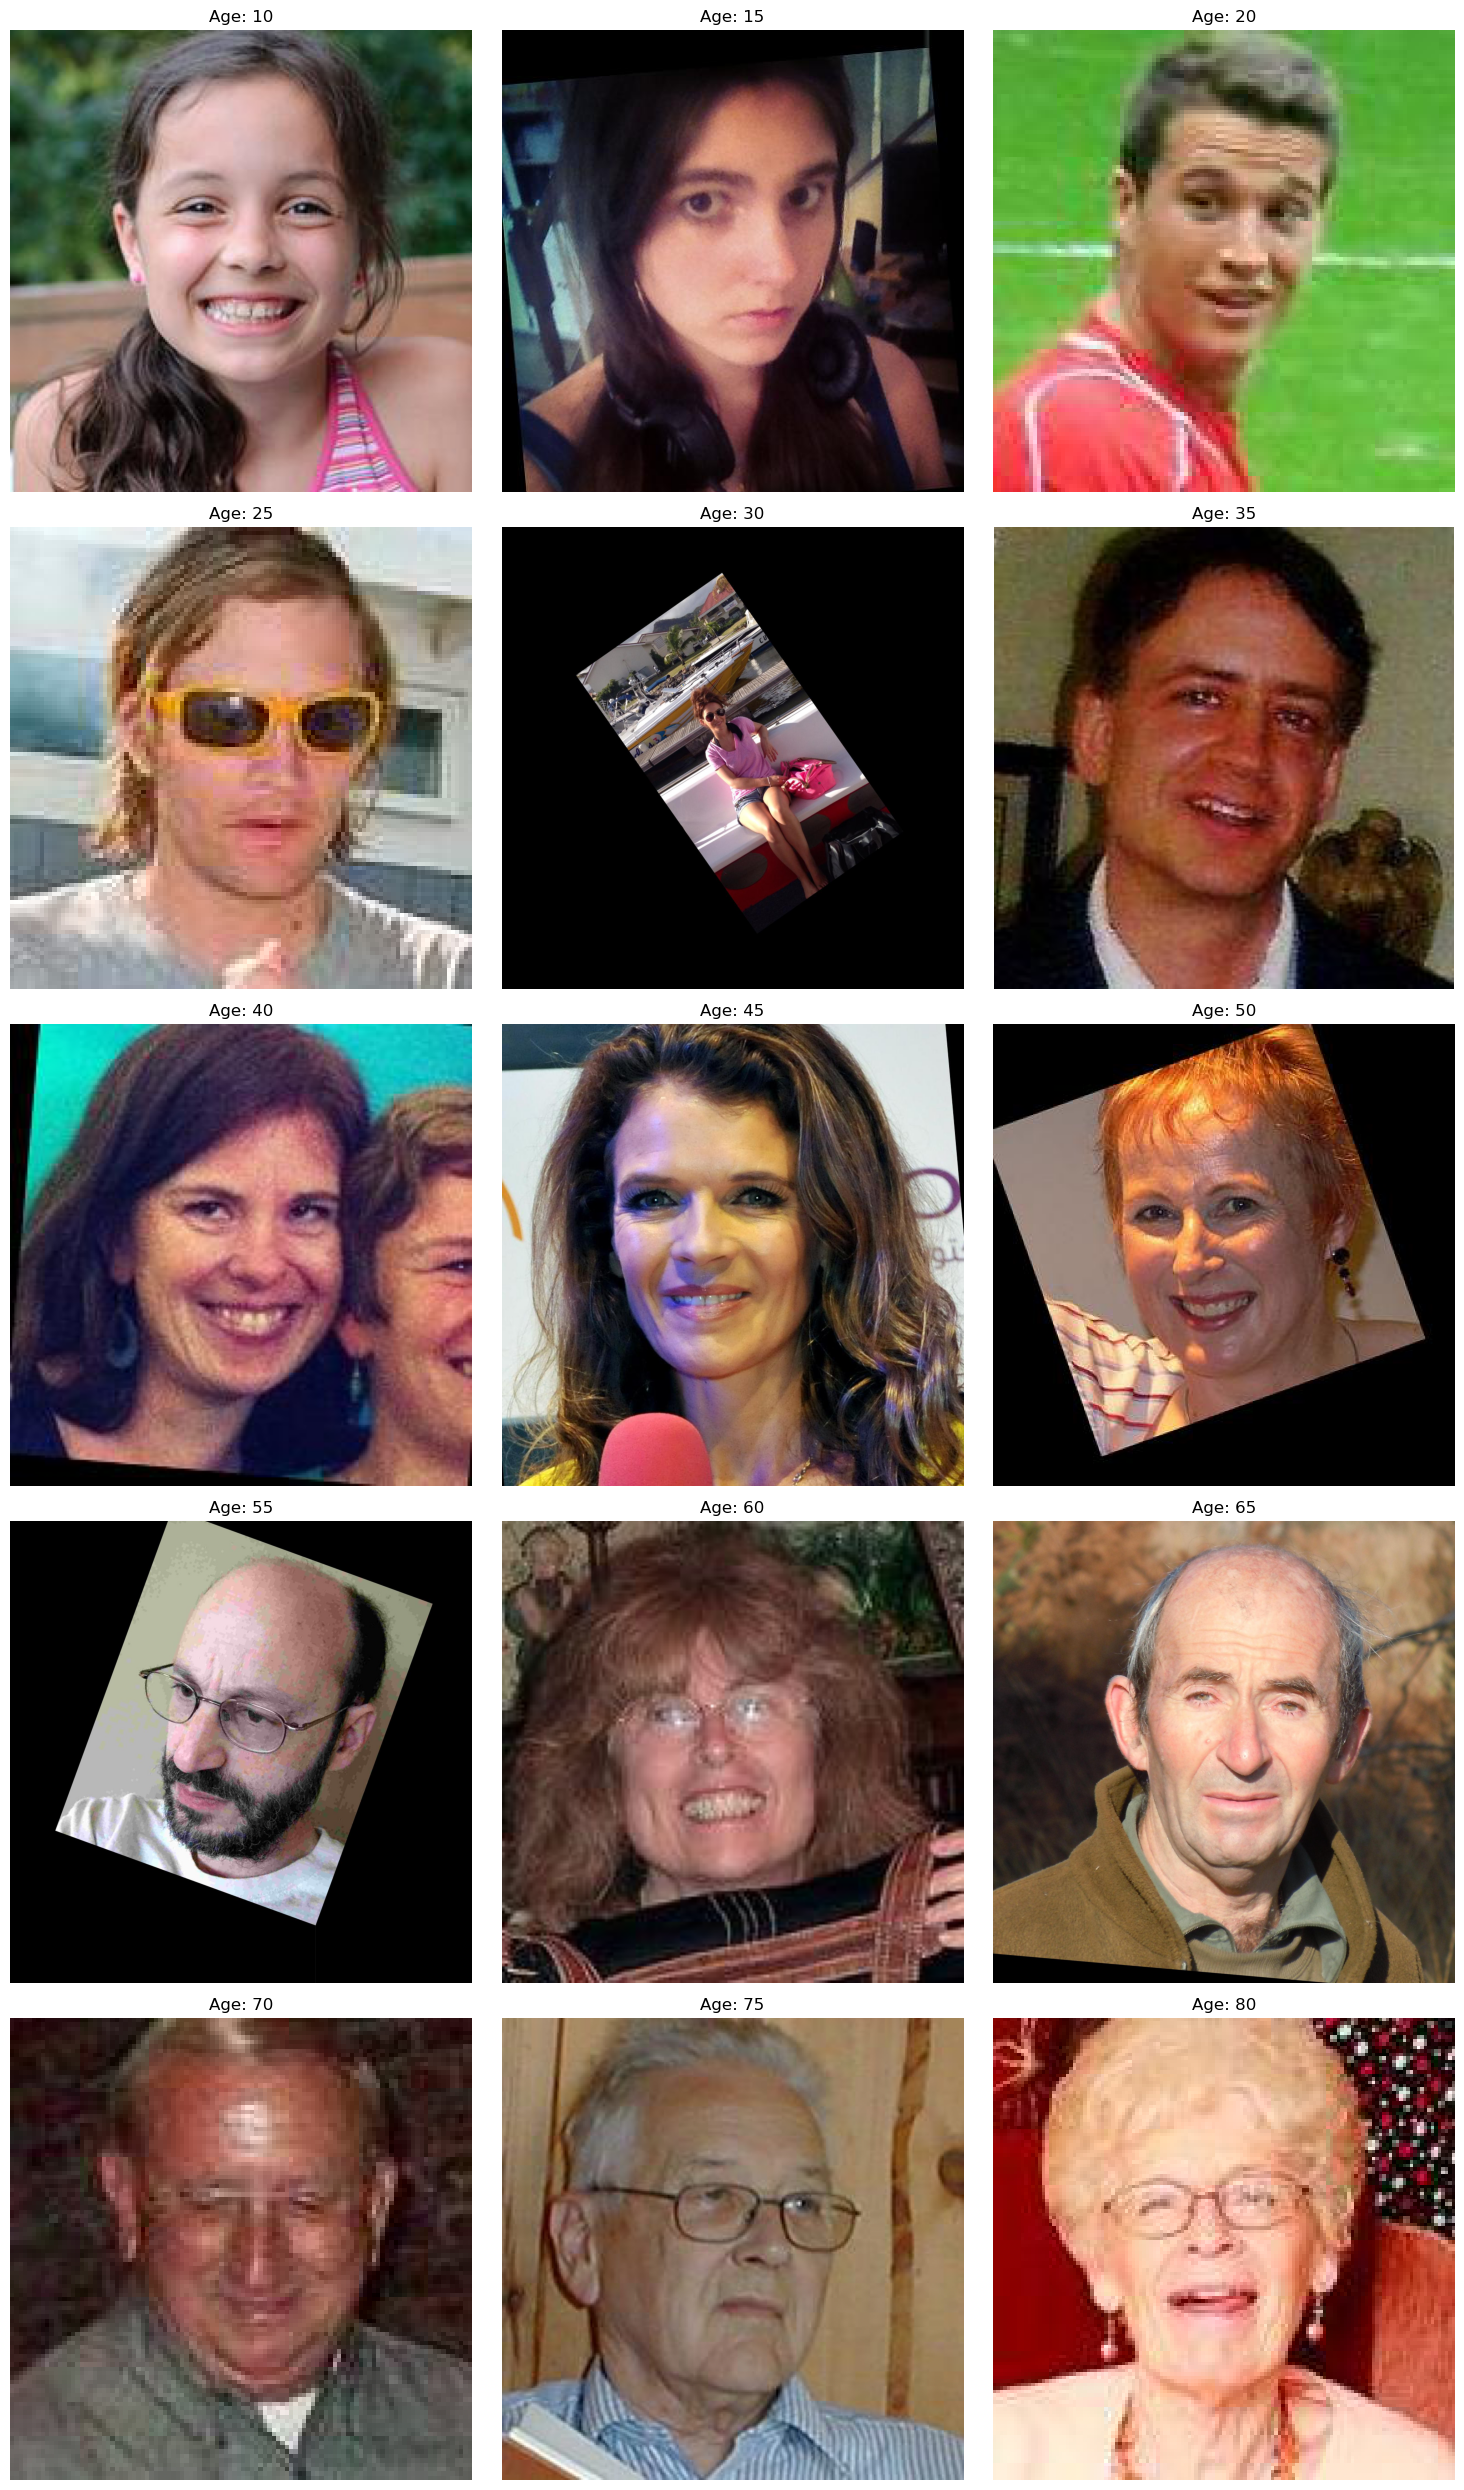

In [12]:
# Create a figure with a grid of subplots (5 rows, 3 columns)
fig, axes = plt.subplots(5, 3, figsize=(15, 5 * 5))
axes = axes.flatten()  # Flatten the 2D array of axes to a 1D array for easier iteration

# Loop through specific ages to display corresponding images
for i, age in enumerate([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]):
    
    # Get the file name of the image corresponding to the selected age
    file_name = labels[labels['real_age'] == age]['file_name'].values[0]
    
    # Construct the full path to the image file
    photo_path = os.path.join('faces/', "final_files", file_name)
    
    # Load the image
    photo = load_img(photo_path)

    # Display the image in the corresponding subplot
    axes[i].imshow(photo)
    axes[i].set_title(f"Age: {age}")  # Set the title indicating the age
    axes[i].axis("off")  # Remove axis ticks and labels for better visualization
    
# Adjust layout to prevent overlapping
plt.tight_layout()
# Show the final figure with all images
plt.show()

**Conclusions**     
Of the 15 photos, the ones with ages 10 and 80 are the only ones with good quality. The rest are blurry, with cropped faces, black backgrounds, and even one full-body photo with glasses where the face is barely visible. **Overall, the photos are of poor quality**.

## Modeling  
The necessary functions to train the model on the GPU platform should be defined, and a single script containing all of them along with the initialization section should be created.

To simplify this task, the functions can be defined in this notebook, and a pre-written code can be executed in the following section to automatically assemble the script.

The definitions provided below will also be reviewed by the project reviewers so that the construction of the model can be understood.

In [13]:
def load_train(path):
    """
    The training portion of the dataset is loaded from the path.
    """

    train_datagen = ImageDataGenerator(
        horizontal_flip=True,
        rescale=1/255,
        rotation_range=30,
        validation_split=0.25,
        zoom_range=0.2
    )
    
    train_datagen_flow = train_datagen.flow_from_dataframe(
        batch_size=16,
        class_mode='raw',
        dataframe=faces_labels,
        directory='/datasets/faces/final_files/',
        seed=12345,
        subset='training',
        target_size=(150, 150),
        x_col='file_name',
        y_col='real_age'
    )
    
    return train_datagen_flow

In [14]:
def load_test(path):
    """
    The validation/test portion of the dataset is loaded from the path
    """
    test_datagen = ImageDataGenerator(
        rescale=1/255,
        validation_split=0.25
    )
    
    test_datagen_flow = test_datagen.flow_from_dataframe(
        batch_size=32,
        class_mode='raw',
        dataframe=faces_labels,
        directory='/datasets/faces/final_files/',
        seed=12345,
        subset='validation',
        target_size=(150, 150),
        x_col='file_name',
        y_col='real_age'
    )
    
    return test_datagen_flow

In [15]:

def create_model(input_shape):
    """
    Define the model using ResNet50 as a backbone for regression.
    """
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    backbone.trainable = False  # Optional: freeze the pretrained layers

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))  # or 'relu' if output must be >= 0

    model.compile(
        loss='mse',
        optimizer=Adam(learning_rate=0.0001),
        metrics=['mae']
    )
    
    return model

In [16]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    """
    The model is trained using the provided training and validation data.

    Parameters:
    - model: compiled Keras model.
    - train_data: training generator or dataset.
    - test_data: validation generator or dataset.
    - batch_size: batch size (only relevant if a generator is not used).
    - epochs: number of training epochs.
    - steps_per_epoch: steps per epoch (optional).
    - validation_steps: validation steps per epoch (optional).

    Returns:
    - The trained model.
    """

    # Steps per epoch are defined if not specified
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)

    if validation_steps is None:
        validation_steps = len(test_data)

    # The model is trained
    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2
    )

    return model

## The script is prepared to be executed on the GPU platform

Once the necessary functions have been defined, a script can be written for the GPU platform, downloaded through the "File|Open..." menu, and later uploaded to be executed on the GPU platform.

Note: the script must also include the initialization section.

In [17]:
init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

###  Result

**The result from the GPU platform is placed here:**

Found 5694 validated image filenames.

Found 1897 validated image filenames.

Train for 178 steps, validate for 60 steps

Epoch 1/20
178/178 - 65s - loss: 245.0955 - mae: 11.1823 - val_loss: 894.1795 - val_mae: 25.0574

Epoch 2/20
178/178 - 38s - loss: 62.5884 - mae: 6.0004 - val_loss: 947.6217 - val_mae: 25.9671

Epoch 3/20
178/178 - 38s - loss: 31.7947 - mae: 4.2828 - val_loss: 331.6021 - val_mae: 13.3702

Epoch 4/20
178/178 - 38s - loss: 19.6925 - mae: 3.4174 - val_loss: 109.8431 - val_mae: 8.0275

Epoch 5/20
178/178 - 38s - loss: 14.7646 - mae: 2.9938 - val_loss: 86.0103 - val_mae: 6.9398

Epoch 6/20
178/178 - 38s - loss: 12.7118 - mae: 2.7601 - val_loss: 70.8739 - val_mae: 6.3532

Epoch 7/20
178/178 - 38s - loss: 10.9120 - mae: 2.5098 - val_loss: 71.6178 - val_mae: 6.5183

Epoch 8/20
178/178 - 38s - loss: 8.4091 - mae: 2.2008 - val_loss: 70.8441 - val_mae: 6.4877

Epoch 9/20
178/178 - 38s - loss: 7.1094 - mae: 2.0067 - val_loss: 70.6308 - val_mae: 6.3671

Epoch 10/20
178/178 - 38s - loss: 7.0045 - mae: 1.9915 - val_loss: 65.9421 - val_mae: 6.2099

Epoch 11/20
178/178 - 38s - loss: 6.7090 - mae: 1.9431 - val_loss: 76.8608 - val_mae: 6.6062

Epoch 12/20
178/178 - 38s - loss: 6.5722 - mae: 1.9482 - val_loss: 65.8247 - val_mae: 6.0685

Epoch 13/20
178/178 - 38s - loss: 5.8667 - mae: 1.8191 - val_loss: 66.8528 - val_mae: 6.3149

Epoch 14/20
178/178 - 38s - loss: 5.2492 - mae: 1.7317 - val_loss: 68.5052 - val_mae: 6.1672

Epoch 15/20
178/178 - 38s - loss: 5.3717 - mae: 1.7398 - val_loss: 64.1595 - val_mae: 6.0654

Epoch 16/20
178/178 - 38s - loss: 5.4877 - mae: 1.7399 - val_loss: 74.2116 - val_mae: 6.4131

Epoch 17/20
178/178 - 39s - loss: 5.2340 - mae: 1.7160 - val_loss: 75.5454 - val_mae: 6.7340

Epoch 18/20
178/178 - 38s - loss: 5.5712 - mae: 1.7661 - val_loss: 64.6718 - val_mae: 6.0515

Epoch 19/20
178/178 - 38s - loss: 5.9201 - mae: 1.8039 - val_loss: 65.5080 - val_mae: 6.1561

Epoch 20/20
178/178 - 38s - loss: 5.5354 - mae: 1.7689 - val_loss: 68.3448 - val_mae: 6.1393

60/60 - 9s - loss: 68.3448 - mae: 6.1393

Test MAE: 6.1393

The MAE score of the model is within the expected range.

## Conclusions

**Model Improvement during Training**

The model has shown a **significant improvement** during training, considerably reducing both the **loss** and **MAE**.

- **At the beginning**, the MAE was **11.18**.
- **At the end of training**, the MAE reached **1.77** on the training data and **6.14** on the validation data.

However, there **is a small gap** between the training and validation MAE, suggesting a **possible overfitting** of the model.

**Considerations on Data Distribution**

A key factor to consider is the distribution of images:

- **Most of the images** correspond to people aged **29 to 31**.
- Only **25%** of the images are of people **under 20 years old**, which is the target group for the alcohol consumption analysis.

Despite this limitation in the data, a **validation MAE of 6.13** was achieved.

**Suggestions for Model Improvement**

To further reduce the **error** and improve generalization, it would be ideal to have **more images of younger individuals**. This would allow the model to **better learn the characteristics of this specific group**.